# Author Names + Affiliations Consolidation Summary

Let's compute some stats for display

In [229]:
import pandas as pd
# from unidecode import unidecode
import re
from datetime import date
import json
import numpy as np
import string
import time
from matplotlib import pyplot
import matplotlib as plt
# from fuzzywuzzy import fuzz 
# from fuzzywuzzy import process 
# set column options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
from functools import reduce
import pprint
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('tableau-colorblind10' )


In [230]:
base_path="/Users/sijiawu/Work/Thesis/Data/Affiliations/"

In [231]:
content_ex=['MISC',  'Discussion', 'Review', 'Review2',"Errata"]
content=['Article', 'Comment', 'Reply', 'Rejoinder']
jid=["aer","ecta","jpe","qje","res"]

In [232]:
with open(base_path+"author_proc_all_w_red.json") as f: 
    data = f.read() 
proc_auths_all = json.loads(data) 

proc_auths=pd.read_pickle(base_path+"auth_proc_w_aff_flat.pkl")
j_data=pd.read_pickle(base_path.split('Aff')[0]+"Combined/022_merged_proc_scopus_inception_with_auth_split_2020_content_type_corrected.pkl")

In [343]:
proc_auths["consolidated"]=proc_auths["resolution"]


In [344]:
proc_auths.columns

Index(['auth_ord', 'raw', 'init', 'suffix', 'a1', 'a2', 'a3', 'last', 'affs',
       'year', 'content_type', 'jid', 'url', 'a1_order', 'a2_order',
       'a3_order', 'init_order', 'fl', 'a1_tk_count', 'ini', 'inil', 'r_a1',
       'r_a1_name', 'p_a1', 'p_a1_name', 'resolution', 'consolidated'],
      dtype='object')

In [345]:
proc_auths["content_type"].value_counts()

content_type
Article      43431
Comment       1807
Reply         1064
Rejoinder      134
Name: count, dtype: int64

In [346]:
tbl=[["Description","Total", "\\% of Raw", "Reduced by"],
 ]
tbl.append(["Author names allowing for duplication", "{0:,}".format(proc_auths["raw"].shape[0]),"-","-"])
tbl.append(["Unique names raw format", "{0:,}".format(proc_auths["raw"].unique().shape[0]),"-","-"])
tbl.append(["Unique names initial processing", "{0:,}".format(proc_auths["init"].unique().shape[0]),"{0:,.3f}\\%".format(proc_auths["init"].unique().shape[0]*100/proc_auths["raw"].unique().shape[0]),"{0:,}".format(-proc_auths["init"].unique().shape[0]+proc_auths["raw"].unique().shape[0])])
tbl.append(["Unique alias 1 names (a1)", "{0:,}".format(proc_auths["a1"].unique().shape[0]),"{0:,.3f}\\%".format(proc_auths["a1"].unique().shape[0]*100/proc_auths["raw"].unique().shape[0]),"{0:,}".format(-proc_auths["a1"].unique().shape[0]+proc_auths["raw"].unique().shape[0])])
tbl.append(["Unique alias 2 names (a2)", "{0:,}".format(proc_auths["a2"].unique().shape[0]),"{0:,.3f}\\%".format(proc_auths["a2"].unique().shape[0]*100/proc_auths["raw"].unique().shape[0]), "{0:,}".format(-proc_auths["a2"].unique().shape[0]+proc_auths["raw"].unique().shape[0])])
tbl.append(["Unique alias 3 names (a3)", "{0:,}".format(proc_auths["a3"].unique().shape[0]),"{0:,.3f}\\%".format(proc_auths["a3"].unique().shape[0]*100/proc_auths["raw"].unique().shape[0]),"{0:,}".format(-proc_auths["a3"].unique().shape[0]+proc_auths["raw"].unique().shape[0])])
tbl.append(["Unique last names", "{0:,}".format(proc_auths["last"].unique().shape[0]),"-","-"])
tbl.append(["Unique names after consolidation", "{0:,}".format(proc_auths["consolidated"].unique().shape[0]),"{0:,.3f}\\%".format(proc_auths["consolidated"].unique().shape[0]*100/proc_auths["raw"].unique().shape[0]),"{0:,}".format(-proc_auths["consolidated"].unique().shape[0]+proc_auths["raw"].unique().shape[0])])

In [333]:
proc_auths["url"].unique().shape

(29393,)

In [334]:
temp_str="\\toprule\n"

temp_str+= "\\makecell[l]{{\\textbf{{{}}}}} & \\textbf{{{}}} & \\textbf{{{}}} & \\textbf{{{}}} \\\\ \n".format(tbl[0][0], tbl[0][1], tbl[0][2], tbl[0][3])
temp_str+="\\midrule\n"
for i in range(1,len(tbl)):
    row = "\\makecell[l]{{{}}} & {} & {} & {}\\\\\n".format(tbl[i][0], tbl[i][1], tbl[i][2], tbl[i][3])
    temp_str+=row
temp_str+="\\bottomrule"

print(temp_str)

\toprule
\makecell[l]{\textbf{Description}} & \textbf{Total} & \textbf{\% of Raw} & \textbf{Reduced by} \\ 
\midrule
\makecell[l]{Author names allowing for duplication} & 46,436 & - & -\\
\makecell[l]{Unique names raw format} & 18,861 & - & -\\
\makecell[l]{Unique names initial processing} & 17,471 & 92.630\% & 1,390\\
\makecell[l]{Unique alias 1 names (a1)} & 17,304 & 91.745\% & 1,557\\
\makecell[l]{Unique alias 2 names (a2)} & 16,189 & 85.833\% & 2,672\\
\makecell[l]{Unique alias 3 names (a3)} & 14,388 & 76.284\% & 4,473\\
\makecell[l]{Unique last names} & 10,734 & - & -\\
\makecell[l]{Unique names after consolidation} & 15,613 & 82.779\% & 3,248\\
\bottomrule


In [347]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [349]:
df = proc_auths[(proc_auths['year'] >= 1940) & (proc_auths['year'] <= 2019)].copy()
df['decade'] = (df['year'] // 10) * 10

# Step 2: Group by decade and compute unique counts per column
grouped = df.groupby('decade').agg({
    'raw': pd.Series.nunique,
    'init': pd.Series.nunique,
    'a1': pd.Series.nunique,
    'a2': pd.Series.nunique,
    # 'a3': pd.Series.nunique,
    'consolidated': pd.Series.nunique
}).reset_index()

# Optional: rename columns for clarity
grouped.columns = ['decade', 'unique_raw', 'unique_init', 'unique_a1',
                    'unique_a2', 
                    # 'unique_a3', 
                    'unique_consolidated']
grouped["reduction_raw"]=grouped["unique_raw"]/grouped["unique_raw"]
grouped["reduction_init"]=grouped["unique_init"]/grouped["unique_raw"]
grouped["reduction_a1"]=grouped["unique_a1"]/grouped["unique_raw"]
grouped["reduction_a2"]=grouped["unique_a2"]/grouped["unique_raw"]
# grouped["reduction_a3"]=grouped["unique_a3"]/grouped["unique_raw"]
grouped["reduction_consolidated"]=grouped["unique_consolidated"]/grouped["unique_raw"]

In [351]:
grouped

,decade,unique_raw,unique_init,unique_a1,unique_a2,unique_consolidated,reduction_raw,reduction_init,reduction_a1,reduction_a2,reduction_consolidated
0,1940,1254,1251,1238,1152,1133,1.0,0.997608,0.987241,0.918660,0.903509
1,1950,1420,1416,1409,1342,1314,1.0,0.997183,0.992254,0.945070,0.925352
2,1960,2074,2073,2058,1915,1851,1.0,0.999518,0.992285,0.923337,0.892478
3,1970,3432,3428,3404,3195,3060,1.0,0.998834,0.991841,0.930944,0.891608
4,1980,3540,3531,3520,3432,3293,1.0,0.997458,0.994350,0.969492,0.930226
5,1990,3405,3390,3385,3335,3213,1.0,0.995595,0.994126,0.979442,0.943612
6,2000,3854,3844,3836,3777,3666,1.0,0.997405,0.995330,0.980021,0.951220
7,2010,6124,5196,5169,5048,4973,1.0,0.848465,0.844056,0.824298,0.812051


In [352]:
temp_str="\\toprule\n"

temp_str+= "\\makecell[l]{{\\textbf{{Decade}}}} & \\textbf{{{Raw}}} & \\textbf{{{Initial Proc}}} & \\textbf{{{a1 Format}}} & \\textbf{{{Consolidated}}} \\\\ \n"
temp_str+="\\midrule\n"
for i in grouped.index:
    row = "\\makecell[l]{{{0}}} & {1:,} & {2:,} ({3:,.3f} \\%) & {4:,} ({5:,.3f} \\%) & {6:,} ({7:,.3f} \\%) \\\\\n".format(grouped.loc[i,"decade"], 
                                                                                 grouped.loc[i,"unique_raw"],
                                                                                 grouped.loc[i,"unique_init"],
                                                                                 grouped.loc[i,"reduction_init"]*100,
                                                                                 grouped.loc[i,"unique_a1"],
                                                                                 grouped.loc[i,"reduction_a1"]*100,
                                                                                 grouped.loc[i,"unique_consolidated"],
                                                                                 grouped.loc[i,"reduction_consolidated"]*100)
    temp_str+=row

temp_str+="\\bottomrule"

print(temp_str)

\toprule
\makecell[l]{{\textbf{{Decade}}}} & \textbf{{{Raw}}} & \textbf{{{Initial Proc}}} & \textbf{{{a1 Format}}} & \textbf{{{Consolidated}}} \\ 
\midrule
\makecell[l]{1940} & 1,254 & 1,251 (99.761 \%) & 1,238 (98.724 \%) & 1,133 (90.351 \%) \\
\makecell[l]{1950} & 1,420 & 1,416 (99.718 \%) & 1,409 (99.225 \%) & 1,314 (92.535 \%) \\
\makecell[l]{1960} & 2,074 & 2,073 (99.952 \%) & 2,058 (99.229 \%) & 1,851 (89.248 \%) \\
\makecell[l]{1970} & 3,432 & 3,428 (99.883 \%) & 3,404 (99.184 \%) & 3,060 (89.161 \%) \\
\makecell[l]{1980} & 3,540 & 3,531 (99.746 \%) & 3,520 (99.435 \%) & 3,293 (93.023 \%) \\
\makecell[l]{1990} & 3,405 & 3,390 (99.559 \%) & 3,385 (99.413 \%) & 3,213 (94.361 \%) \\
\makecell[l]{2000} & 3,854 & 3,844 (99.741 \%) & 3,836 (99.533 \%) & 3,666 (95.122 \%) \\
\makecell[l]{2010} & 6,124 & 5,196 (84.847 \%) & 5,169 (84.406 \%) & 4,973 (81.205 \%) \\
\bottomrule


In [357]:

plt.style.use('tableau-colorblind10' )

def plot_unique_with_reduction_annotations(df_grouped, span, increase_font):
    """
    Plots a grouped bar chart for unique_* columns with annotations showing
    both count and percentage reduction in a single rotated line.
    
    Parameters:
        df_grouped (pd.DataFrame): DataFrame with 'decade', 'unique_*', and 'reduction_*' columns
        colors (list): Optional list of bar colors
    """
    # Identify columns
    unique_cols = [col for col in df_grouped.columns if col.startswith("unique_")]
    reduction_cols = ["reduction_" + col.split("unique_")[1] for col in unique_cols]

    x = np.arange(len(df_grouped))  # decade positions
    num_bars = len(unique_cols)
    width = 0.8 / num_bars
    
    # Extract decade labels
    decade_labels = df_grouped['decade'].astype(str)

    fig, ax = plt.subplots(figsize=(12, 8))

    # Set y-limit to leave space for annotations
    max_height = df_grouped[unique_cols].to_numpy().max()
    ax.set_ylim(0, max_height * 1.25)

    for i, (unique_col, reduction_col) in enumerate(zip(unique_cols, reduction_cols)):
        offset = (i - num_bars / 2) * width + width / 2
        heights = df_grouped[unique_col]
        reductions = df_grouped[reduction_col] * 100

        bar_label = unique_col.replace("unique_", "")[0:6]
        bars = ax.bar(x + offset, heights, width, label=unique_col.replace("unique_", "")[0:6])

        # Annotate at group max height (per-decade)
        for j, bar in enumerate(bars):
            group_max = df_grouped.loc[j, unique_cols].max()
            value_label = f'{int(heights.iloc[j])} ({reductions.iloc[j]:.1f}%)'

            # Main annotation at group max height
            ax.annotate(value_label,
                        xy=(bar.get_x() + bar.get_width() / 2, group_max+25),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        rotation=90, fontsize=11+increase_font)

            # Secondary annotation at y=1000 (label of bar)
            ax.annotate(bar_label,
                        xy=(bar.get_x() + bar.get_width() / 2, 150),
                        textcoords="data",
                        ha='center', va='bottom',
                        rotation=90, color='white', fontsize=11+increase_font, fontweight='bold')
            
    # X-axis and chart styling
    ax.set_xticks(x)
    ax.set_xticklabels(decade_labels, fontsize=11+increase_font)
    ax.tick_params(axis='y', labelsize=11+increase_font)
    ax.set_xlabel(span)
    ax.set_ylabel('Number of Unique Names')
    ax.legend(title="Field", fontsize=11+increase_font, title_fontsize=13+increase_font)


    plt.tight_layout()
    plt.show()


In [358]:
grouped.columns

Index(['decade', 'unique_raw', 'unique_init', 'unique_a1', 'unique_a2',
       'unique_consolidated', 'reduction_raw', 'reduction_init',
       'reduction_a1', 'reduction_a2', 'reduction_consolidated'],
      dtype='object')

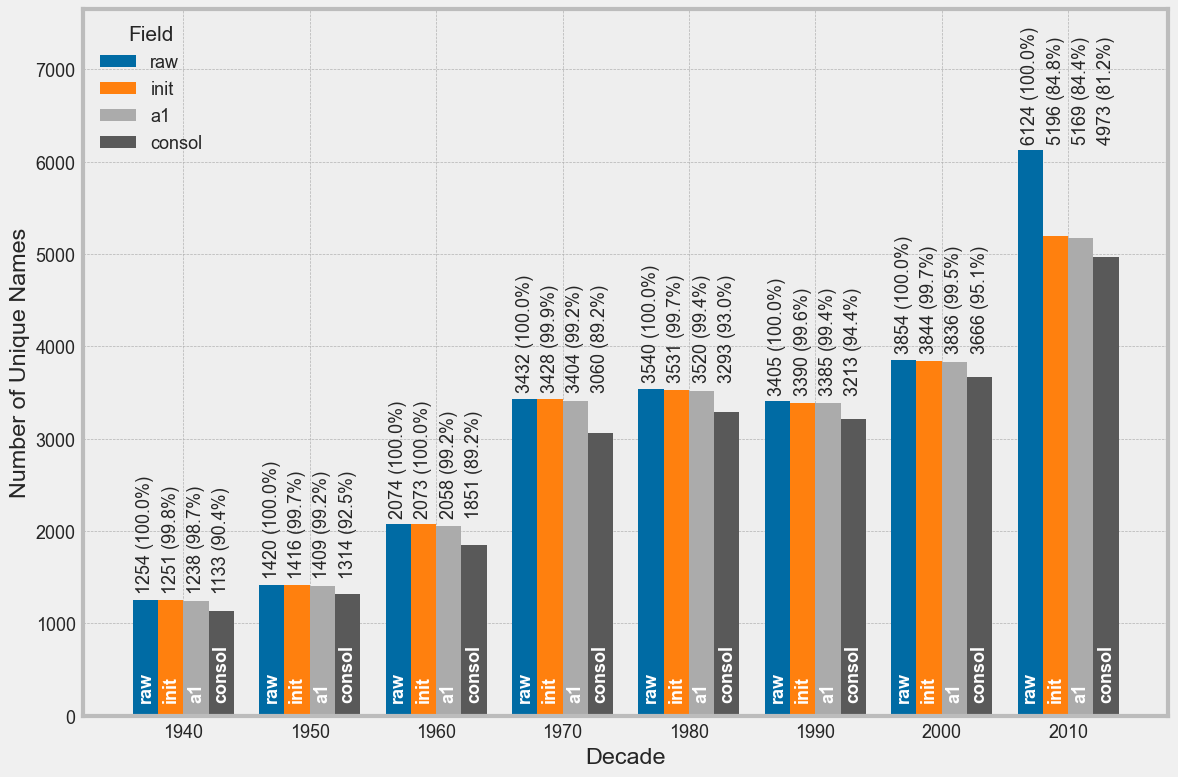

In [359]:
plot_unique_with_reduction_annotations(grouped[['decade', 'unique_raw', 'unique_init', 'unique_a1',
       'unique_consolidated', 'reduction_raw', 'reduction_init', 'reduction_a1', 'reduction_consolidated']], "Decade", 2)


In [365]:
df = proc_auths[(proc_auths['year'] >= 1940) & (proc_auths['year'] <= 2019)].copy()
df['decade'] = (df['year'] // 20) * 20

grouped = df.groupby('decade').agg({
    'raw': pd.Series.nunique,
    'init': pd.Series.nunique,
    'a1': pd.Series.nunique,
    'a2': pd.Series.nunique,
    # 'a3': pd.Series.nunique,
    'consolidated': pd.Series.nunique
}).reset_index()

# Optional: rename columns for clarity
grouped.columns = ['decade', 'unique_raw', 'unique_init', 'unique_a1',
                    'unique_a2', 
                    # 'unique_a3', 
                    'unique_consolidated']
grouped["reduction_raw"]=grouped["unique_raw"]/grouped["unique_raw"]
grouped["reduction_init"]=grouped["unique_init"]/grouped["unique_raw"]
grouped["reduction_a1"]=grouped["unique_a1"]/grouped["unique_raw"]
grouped["reduction_a2"]=grouped["unique_a2"]/grouped["unique_raw"]
# grouped["reduction_a3"]=grouped["unique_a3"]/grouped["unique_raw"]

grouped["reduction_consolidated"]=grouped["unique_consolidated"]/grouped["unique_raw"]

In [366]:
grouped.columns

Index(['decade', 'unique_raw', 'unique_init', 'unique_a1', 'unique_a2',
       'unique_consolidated', 'reduction_raw', 'reduction_init',
       'reduction_a1', 'reduction_a2', 'reduction_consolidated'],
      dtype='object')

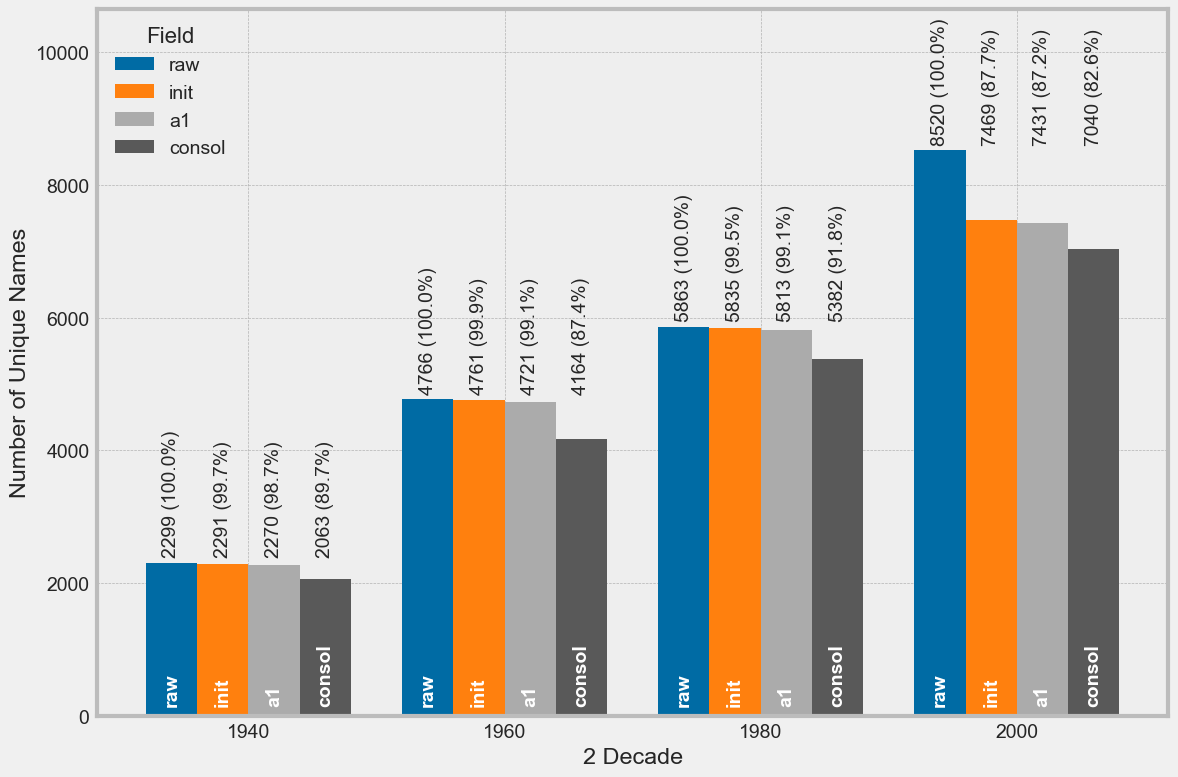

In [367]:
plot_unique_with_reduction_annotations(grouped[['decade', 'unique_raw', 'unique_init', 'unique_a1',
       'unique_consolidated', 'reduction_raw', 'reduction_init', 'reduction_a1', 'reduction_consolidated']], "2 Decade", 3)